In [59]:
import numpy as np
import pandas
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.curdir, '..'))
from support.mecanum_calculations import *
from support.pd_support import *

In [94]:
_folder_name = "sk22_30_sideways_fast"
_parent_folder_name = "cam_and_sensor_feb_1_2023_5cm"

_base_pth = os.path.dirname(os.getcwd())
_base_pth = os.path.join(_base_pth, 'recording_programs', "test_data",_parent_folder_name)
_base_pth


'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\armbo\\recording_programs\\test_data\\cam_and_sensor_feb_1_2023_5cm'

In [95]:
_sensor_pth = os.path.join(_base_pth, _folder_name, "imu01.csv")
_mc_pth = os.path.join(_base_pth, _folder_name.split("_")[0],_folder_name + ".csv")
_mc_pth

'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\armbo\\recording_programs\\test_data\\cam_and_sensor_feb_1_2023_5cm\\sk22\\sk22_30_sideways_fast.csv'

In [96]:
sk_df = pd.read_csv(_sensor_pth)
mc_df, st_time = read_rigid_body_csv(_mc_pth)
mc_df = add_datetime_col(mc_df, st_time,_name="seconds")

radius = 47.5/1000
lx = 79 #half of the distance between the wheels
ly = 122.5/2

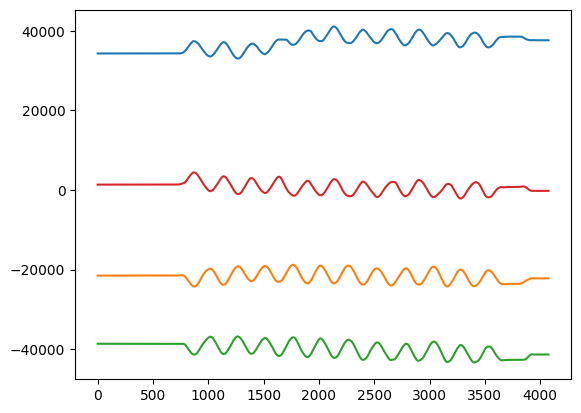

In [97]:
plt.plot(sk_df["e_fr"])
plt.plot(sk_df["e_fl"])
plt.plot(sk_df["e_rr"])
plt.plot(sk_df["e_rl"])

In [98]:
_sk_df = set_zero(sk_df)
_sk_df, _ang_column = get_angular_velocity(_sk_df)
_sk_df, _ = get_directional_velocity(_sk_df, _ang_column, radius, lx, ly)
_sk_df, _ = get_position(_sk_df)
_sk_df["sys_time"] = pd.to_datetime(_sk_df["sys_time"])

In [99]:
mc_df["time"]

0      2023-02-01 15:33:07.786
1      2023-02-01 15:33:07.796
2      2023-02-01 15:33:07.806
3      2023-02-01 15:33:07.816
4      2023-02-01 15:33:07.826
                 ...          
3734   2023-02-01 15:33:45.126
3735   2023-02-01 15:33:45.136
3736   2023-02-01 15:33:45.146
3737   2023-02-01 15:33:45.156
3738   2023-02-01 15:33:45.166
Name: time, Length: 3739, dtype: datetime64[ns]

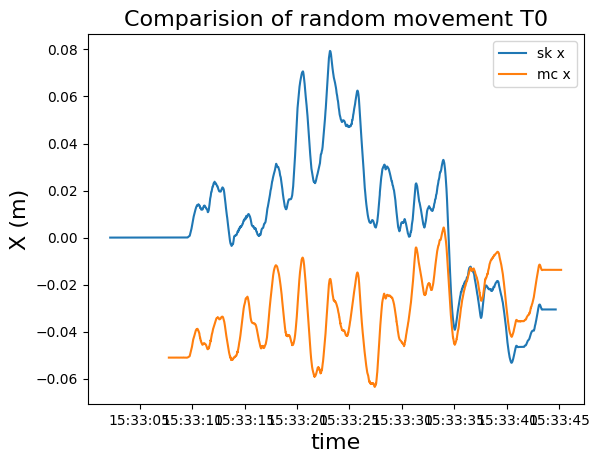

In [100]:
plt.plot(_sk_df["sys_time"], _sk_df['x_val'], label = "sk x")
plt.plot(mc_df["time"], mc_df['m1_z'] + 0.01, label = "mc x")
plt.xlabel("time", fontsize=16)
plt.ylabel("X (m)", fontsize=16)
plt.title("Comparision of random movement T0", fontsize=16)
plt.legend()

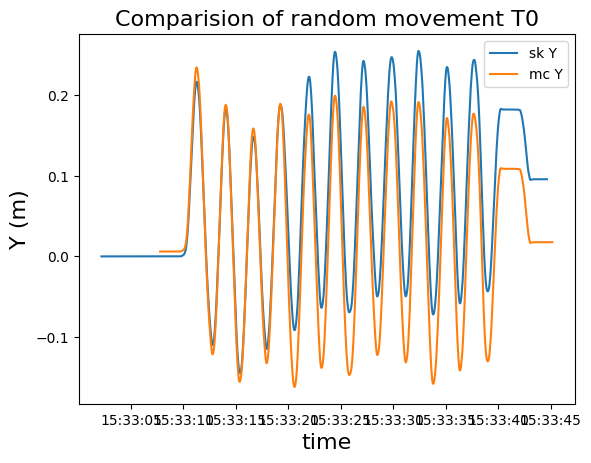

In [105]:
plt.plot(_sk_df["sys_time"], _sk_df['y_val'], label = "sk Y")
plt.plot(mc_df["time"], mc_df['m1_x'] + 0.08, label = "mc Y")
plt.xlabel("time", fontsize=16)
plt.ylabel("Y (m)", fontsize=16)
plt.title("Comparision of random movement T0", fontsize=16)
plt.legend()

[]

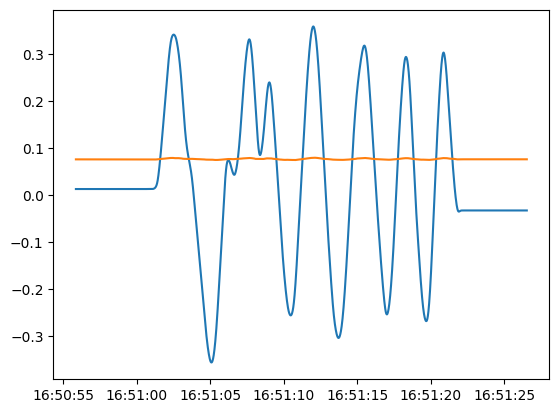

In [68]:
plt.plot(mc_df["time"], mc_df['m1_x'], label = "mc x")
plt.plot(mc_df["time"], mc_df['m1_y'], label = "mc y")
plt.plot()
